### **Problem 1: Book Price Prediction**

#### **1. Import necessary packages:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### **2. Upload and load dataset:**
At first we have to upload the dataset to google colab to start working with it. Please download the **"bookprice.csv"** dataset from the class drive **Lab/numPy/Resources** folder. Then click on files form sidebar, drag and drop your file to side bar to upload the dataset.

Now, use `data = pd.read_csv("/content/bookprice.csv")` to load the data.

In [ ]:
data = pd.read_csv("/content/bookprice.csv")

#### **3. Preprocess the Data:**

* To visualize the loaded data use `print(data.head())`. 

In [ ]:
data.head()

,pages,price
0,166,54
1,195,82
2,200,72
3,260,72
4,265,90


* The column `'price'` is not a feature, it is our target that we are trying to predict. 
  * We will store it in a seperate variable `Y` using `Y = data['price']`.
  * Convert `y` to numpy array using `Y = Y.values`
  * Dorp the column from `data` using `data.drop('price', axis=1, inplace=True)`
* In `data` we are left with all 1 feature. Covert it to numpy array and store in a new variable `X` using `X = data.values`. So, `X` is the matrix of feature columns, each column in `X` will be the feature vectors.

☢ Note: Be careful about the space after the column name `'price'`.

In [ ]:
# Load the price column separately
Y = data["price"].values

# remove it from the data set
data.drop('price', axis=1, inplace=True)

# convert the rest of the data into X
X = data.values
X.shape

(10, 1)

#### **4. Plot the data**
   

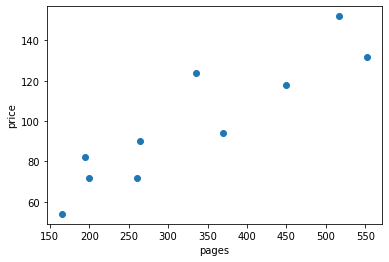

In [ ]:
plt.scatter(X, Y)
plt.xlabel("pages")
plt.ylabel("price")
plt.show()

#### **5. Add a ones column vector to X:**

Add a new column cosisting ones as $0^{th}$ column to X. Use 
``` np.column_stack() ```





In [ ]:
X = np.column_stack([np.ones(X.shape), X])
print(X)

[[  1. 166.]
 [  1. 195.]
 [  1. 200.]
 [  1. 260.]
 [  1. 265.]
 [  1. 335.]
 [  1. 370.]
 [  1. 450.]
 [  1. 517.]
 [  1. 552.]]


#### **6. Solve the system of equation:**

> $$price = B_0 + B_1*pages$$
> $$X .  
\begin{equation} 
	\begin{bmatrix} 
		B_0 \\ B_1  
	\end{bmatrix} 
\end{equation} =\ price $$

Solve the system of equations $(Xβ = y)$ to find the values of the $β$ vector $(β_0, β_1, β_2, \ldots, β_n)$. \\
You can find $β$ using $β = X^† y = (X^T X)^{−1} X^T y $. \\
There is also a numpy function to calculate the psuedo inverse: `np.linalg.pinv()`, see the [numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html) for more details. \\
Use `X` and `Y` as dataset.

In [ ]:
# perform regression
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)), X.T), Y)
print("Formula: ", beta)
beta = np.dot(np.linalg.pinv(X), Y)
print("Pinv: ", beta)

Formula:  [31.21812687  0.20477907]
Pinv:  [31.21812687  0.20477907]


#### **7. Predict Book prices from book pages**
>**a.** Find and print the predicted chance of admit $\hat y$ (`y_hat`), by multiplying $X * β$. \\
>
>**b.** create 5 new test data of appropriate dimesions and find and print their price predictions


In [ ]:
y_hat = np.dot(X, beta)
print(y_hat)

[ 64.35015898  70.37836646  71.41771257  83.88986598  84.9292121
  99.48005775 106.75548057 123.38501845 137.31225642 144.58767924]


In [ ]:
x_new = np.array([1, 200])
y_ = np.dot(x_new, beta)
print("Predicted price: ", y_)

Predicted price:  72.17394145169007


#### **8. Error calculation**

* Calculate error, ```e = y_hat - Y ```
* Calculate and print SSE error. $SSE$ is the sum of squared errors: $e^Te$ 
* Calculate MSE (Mean Squared error)
* Calculate RMSE (Root mean square error)  
* Print RMSE error
* Plot **Y, y_hat** and error, **e** in one figure. Use ```X[:, 1]``` as the x-axis



In [ ]:
y_hat = np.dot(X, beta)

e = Y - y_hat
# SSE Sum of squared errors
SSE = np.dot(e, e)
# Mean Squared Error
MSE = SSE/len(e)
# Root mean square error
RMSE = np.sqrt(MSE)
print("RMSE Error: ",RMSE)

RMSE Error:  12.556738331383649


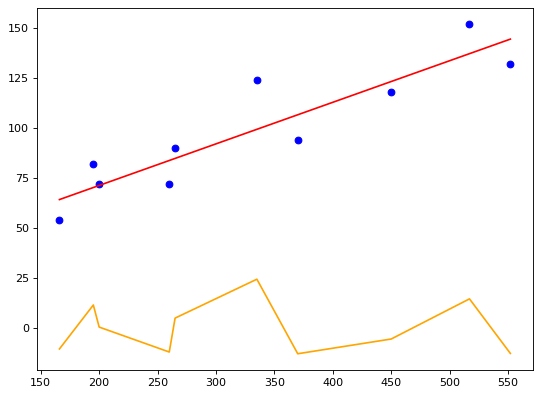

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(X[:, 1], y_hat, color='red')
plt.scatter(X[:, 1], Y, color='blue')
plt.plot(X[:, 1], e, color='orange')
plt.show()

#### **9. Adding more features to the feature matrix to improve prediction accuracy**
If we wish we can add more features to the feature matrix X, in order to fit a 
more complex curve to the target Y

In [ ]:
X1 = np.column_stack([X, X[:,1]**2, np.log(X[:,1])])

print(15*"- ", "Old feature set X", 15*"- ")
print(X)
print(15*"- ", "New feature set X2", 15*"- ")
print(X1)

- - - - - - - - - - - - - - -  Old feature set X - - - - - - - - - - - - - - - 
[[  1. 166.]
 [  1. 195.]
 [  1. 200.]
 [  1. 260.]
 [  1. 265.]
 [  1. 335.]
 [  1. 370.]
 [  1. 450.]
 [  1. 517.]
 [  1. 552.]]
- - - - - - - - - - - - - - -  New feature set X2 - - - - - - - - - - - - - - - 
[[1.00000000e+00 1.66000000e+02 2.75560000e+04 5.11198779e+00]
 [1.00000000e+00 1.95000000e+02 3.80250000e+04 5.27299956e+00]
 [1.00000000e+00 2.00000000e+02 4.00000000e+04 5.29831737e+00]
 [1.00000000e+00 2.60000000e+02 6.76000000e+04 5.56068163e+00]
 [1.00000000e+00 2.65000000e+02 7.02250000e+04 5.57972983e+00]
 [1.00000000e+00 3.35000000e+02 1.12225000e+05 5.81413053e+00]
 [1.00000000e+00 3.70000000e+02 1.36900000e+05 5.91350301e+00]
 [1.00000000e+00 4.50000000e+02 2.02500000e+05 6.10924758e+00]
 [1.00000000e+00 5.17000000e+02 2.67289000e+05 6.24804287e+00]
 [1.00000000e+00 5.52000000e+02 3.04704000e+05 6.31354805e+00]]


####**Linear regression**

In [ ]:
beta1 = np.dot(np.linalg.pinv(X1), Y)
print(15*"- ", "Beta1", 15*"- ")
print(beta1)

- - - - - - - - - - - - - - -  Beta1 - - - - - - - - - - - - - - - 
[-3.46554246e+02 -2.05402433e-01  2.12509594e-04  8.50399103e+01]


####**Error Calculation**

In [ ]:
y_hat = np.dot(X1, beta1)

e = Y - y_hat
# SSE Sum of squared errors
SSE = np.dot(e, e)
# Mean Squared Error
MSE = SSE/len(e)
# Root mean square error
RMSE = np.sqrt(MSE)
print("RMSE Error: ", RMSE)

RMSE Error:  12.256306307767396


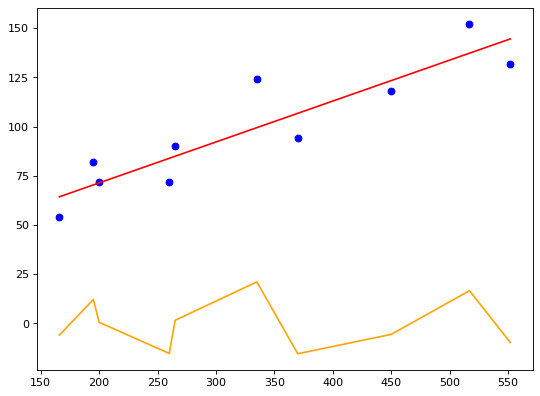

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(X[:, 1], y_hat, color='red')
plt.scatter(X[:, 1], Y, color='blue')
plt.plot(X[:, 1], e, color='orange')
plt.show()

### **(Optional) Gradient Descent**

#### a. Implement Gradient Descent function

In [ ]:
# Write Cost Function
def J(X, beta, Y):
  e = (Y - np.dot(X, beta))
  return np.dot(e, e)

# Write forward difference gradient finding function
def gradient_J(beta, i, X, Y,h = 0.001):
  beta_t = beta.copy()
  beta_t[i] += h
  return (J(X, beta_t, Y) - J(X, beta, Y))/h

# Write Gradient vector finding function
def compute_gr_vector(beta, X, Y):
  gradient_vector = []
  for i in range(0, len(beta)):
    gradient_vector.append(gradient_J(beta, i, X, Y))
  return np.array(gradient_vector)

# write gradient descent function
def gradient_descent(beta, X, Y ,iterations = 1000, alpha = 0.0000001, print_interval = 100):
  loss = []
  print( '|%-10s|%-40s|%-40s|%-20s|' % ("Iteration", "Beta", "Gradient", "Loss" ))
  print( 115*'-')
  for i in range(0, iterations+1):
    loss.append(J(X, beta, Y)) # storing loss for printing etc.
    gr = compute_gr_vector(beta, X, Y) # gradient vector
    beta =  beta - alpha * gr # update beta using gradient vector
    
    if i%print_interval == 0: 
      print( '|%-10d|%-40s|%-40s|%-20.4f|' % (i, beta, gr, J(X, beta, Y)))
  
  print(115*"=")
  loss.append(J(X, beta, Y))
  return beta, loss


#### b. Perform Gradient Descent to find appropriate values for beta

|Iteration |Beta                                    |Gradient                                |Loss                |
-------------------------------------------------------------------------------------------------------------------
|0         |[29.9960418  58.48482837]               |[3.95820009e+05 1.51517163e+08]         |4303058381.9202     |
|100       |[29.85549501  4.68275654]               |[   30387.17694581 11634481.59966245]   |25367921.0370       |
|200       |[29.84470939  0.55148056]               |[  2326.84714883 893371.82507219]       |150739.2051         |
|300       |[29.84388767  0.23425407]               |[  172.19099647 68598.96530977]         |2425.3421           |
|400       |[29.84383106  0.20989532]               |[   6.74238217 5267.4954266 ]           |1579.3507           |
|500       |[29.84383319  0.20802488]               |[ -5.96183008 404.48977586]             |1576.5505           |
|600       |[29.84383983  0.20788124]               |[-6.9373253  31.076

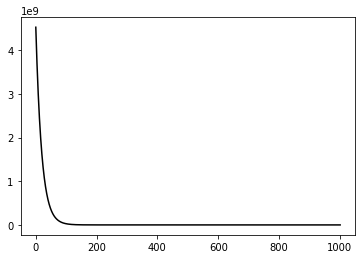

In [ ]:
# perform gradient descent
alpha = 0.00000001

# initial values for beta
beta = [30,60]
loss = []

beta, loss = gradient_descent(beta, X, Y, 1000, alpha)
print("Last Loss: ", loss[-1:])
print("Beta: ", beta)
plt.plot(range(0, len(loss)), loss, "k-")
plt.show()

#### c. Error Calculation
*   Calculate RMSE error as before
*   Plot **Y, y_hat** and error, **e** in one figure. Use ```X[:, 1]``` as the x-axis




Root Mean Square Error:  12.556738331383649


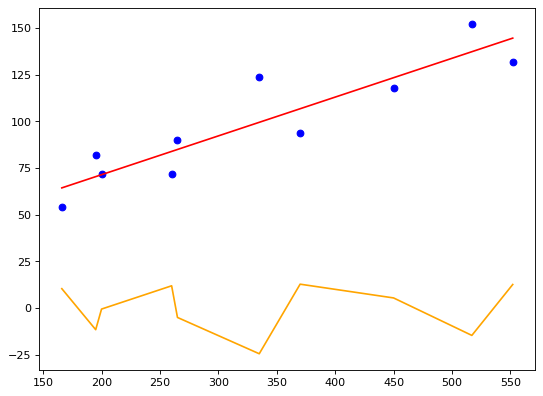

In [ ]:
#error calculation
y_hat = np.dot(X, beta)

e = y_hat-Y

SSE = np.dot(e, e)
# Mean Squared Error
MSE = SSE/len(e)
# Root mean square error
RMSE = np.sqrt(MSE)
print("Root Mean Square Error: ", RMSE)

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(X[:, 1], y_hat, color='red')
plt.scatter(X[:, 1], Y, color='blue')
plt.plot(X[:, 1], e, color='orange')
plt.show()

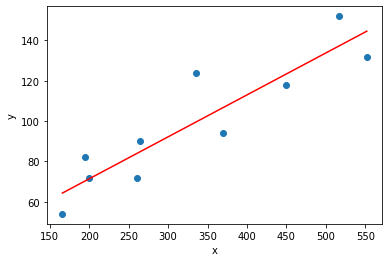

In [ ]:
x_test = X
yy = np.dot(X, beta)
plt.plot(X[:, 1], yy, "r-")
plt.scatter(X[:,1], Y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

###**Problem 2: The Admission problem**

####**1. Upload and load the data**

At first we have to upload the dataset to google colab to start working with it. Please download the **"Admission_Predict.csv"** dataset from Classroom drive **Lab/numPy/Resources** folder. Then click on files form sidebar, drag and drop your file to side bar to upload the dataset.

Now, use `data = pd.read_csv("/content/Admission_Predict.csv")` to load the data.

Be careful not to drag the csv inside a into another folder. In that case the filepath will change. You can right click on the uploaded csv file and select `copy file path` to copy the accurate path and replace the path in the command above. 

#### **2. Preprocess the Data:**
* To visualize the loaded data use `print(data.head())`. 
* Now, after visualizing the data did you observe we have an extra column named `Serial No.`? 
* This certainly is not a feature, so we will drop this column. Use `data.drop('Serial No.', axis=1, inplace=True)` to drop the column.
* See the column `'Chance of Admit'` is also not a feature rather it is our target. 
  * We will store it in a seperate variable `y` using `y = data['Chance of Admit ']`.
  * Convert `y` to numpy array using `y = y.values`
  * Drop the column from `data` using `data.drop('Chance of Admit ', axis=1, inplace=True)`
* In `data` we are left with all 7 features. Covert it to numpy array and store in a new variable `X` using `X = data.values`. So, `X` is the matrix of feature columns, each column in `X` will be the feature vectors.

☢ Note: Be careful about the space after the column name `'Chance of Admit '`. \\
☢ Note: Be careful to remove obviously useless features from the feature set.

#### **3. Process and divide dataset:**
a. Add a new column cosisting ones as $0^{th}$ column to X. You can use ```np.column_stack()``` as before.



b. Divide data X and y into x_train, x_test, y_train and y_test. Train dataset will contain 300 datapoints and test dataset will contain 100 datapoint.

#### **4. Solve the system of equation:**

> $$chance\_to\_admit = B_0 + B_1*x_1 + .. + B_n*x_n$$
> $$X .  
\begin{equation} 
	\begin{bmatrix} 
		B_0 \\ .\\.\\. \\ B_n  
	\end{bmatrix} 
\end{equation} =\ chance\_to\_admit $$

Solve the system of equations $(Xβ = y)$ to find the values of the $β$ vector $(β_0, β_1, β_2, \ldots, β_n)$. \\
You can find $β$ using $β = X^† y = (X^T X)^{−1} X^T y $. \\
There is also a numpy function to calculate the psuedo inverse: `np.linalg.pinv()`, see the [numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html) for more details. \\
Use `X_train` and `Y_train` as dataset.

#### **5. Find predicted chance of admit:**
> **a.** Find the predicted chance of admit $\hat y$, by multiplying $X * β$. For prediction use `x_test` as dataset. \\
>
> **b.** Create new **test data**  of size 5 and use **$β$** to predict chance of admit for this new data.

#### **6. Find RMSE error**
* Calculate error, ```e = y_hat - Y ```
* Calculate and print SSE error. $SSE$ is the sum of squared errors: $e^Te$ 
* Calculate $MSE$ (Mean Squared error)
* Calculate $RMSE$ (Root mean square error)  
* Print $RMSE$ error

c. **Plot** the **y_test, y_hat, e** with an **x axis** produced by  ```np.arange(len(y_test))```



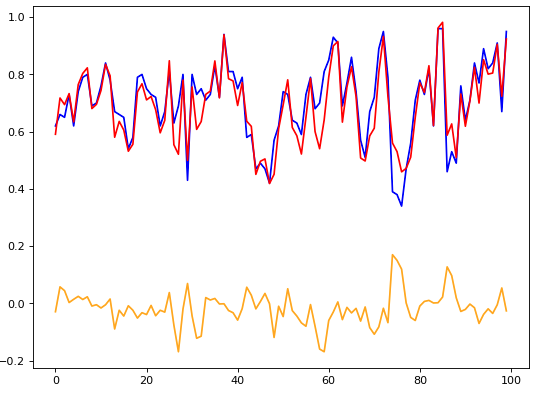

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
# plt.plot(np.arange(len(y_test)), y_test, color='blue')

plt.show()

<Figure size 640x480 with 0 Axes>

#### **7. Feature Egineering**
Adding/removing and processing features in the feature set to try to improve the accuracy of the prediction

> **a.** Choose and add new features to the **X** feature set and store it in a new variable **X1** \\
>
> **b.** Divide the data into `X1_test, X1_train, Y1_test, Y1_train` as before. The train data set should contain 300 datapoints and the test dataset should *contain 100 as before. \\
>
> **c.** Perform linear regression on the new **X1\_train** to find corresponding **$β_1$** (beta1) \\
>
> **d.** Use $β_1$ to predict `Chance of Admit` for data in **X1\_test**  \\
>
> **e.** Calculate and print the $RMSE$ error for the prediction. \\
>
> **f**. Go back to **step a** to try new different feature sets to lower the RMSE error as much as you can

☢ Note: You can use `np.column_stack()` to stack new features to the previous processed feature set.

### **(optional) Gradient Descent**

#### a. Perform Gradient Descent to find appropriate values for beta

In [ ]:
# Initial values
alpha = 0.000000001
iterations = 5000
# beta = np.zeros(len(x_train[0]))


#### b. Calculate SSE error as before
*   Calculate error, ```e = y_hat - y_test ```
*   Calculate and print SSE error. $SSE$ is the sum of squared errors: $e^Te$ 


c. **Plot** the **y_test, y_hat, e** with an **x axis** produced by  ```np.arange(len(y_test))```

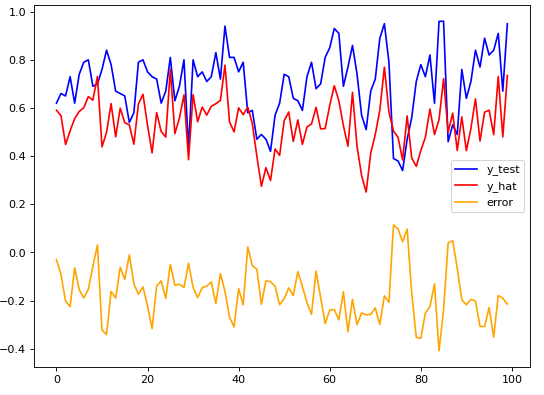

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)

plt.show()

<Figure size 640x480 with 0 Axes>